In [97]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import os
import scipy.io as sio


In [98]:
sc.settings.verbosity = 1 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=300, figsize=(5,4), format='png')


In [99]:
iglut_pp1 = '/links/groups/treutlein/DATA/sequencing/20220405_P1904_HSIU-CHUAN_Parse_iNeuron_S2/processed/iNeuron1_combine_remap/'
iglut_pp2 = '/links/groups/treutlein/DATA/sequencing/20220405_P1904_HSIU-CHUAN_Parse_iNeuron_S2/processed/iNeuron2_combine_remap/'

for sample,sample_name in zip([iglut_pp1,iglut_pp2],['iGlut_post_p1','iGlut_post_p2']):
    print(sample_name)
    sample_path = sample
    data_path = sample_path+"/all-well/DGE_filtered/"
    
    print('loading data')
    # The DGE_filtered folder contains the expression matrix, genes, and files 
    adata = sc.read_mtx(data_path + 'DGE.mtx')

    # reading in gene and cell data
    gene_data = pd.read_csv(data_path + 'all_genes.csv')
    cell_meta = pd.read_csv(data_path + 'cell_metadata.csv')

    print('cleaning matrix')
    # find genes with nan values and filter
    gene_data = gene_data[gene_data.gene_name.notnull()]
    notNa = gene_data.index
    notNa = notNa.to_list()

    # remove genes with nan values and assign gene names
    adata = adata[:,notNa]
    adata.var = gene_data
    adata.var.set_index('gene_name', inplace=True)
    adata.var.index.name = None
    adata.var_names_make_unique()

    print('adding metadata')
    # add cell meta data to anndata object
    adata.obs = cell_meta
    adata.obs.set_index('bc_wells', inplace=True)
    adata.obs.index.name = None
    adata.obs_names_make_unique()
    adata.obs['plateID'] = sample_name

    # Returns the dimensions of the expression matrix (cells, genes)
    print(adata.shape)
    
    print('saving file')
    adata.write_h5ad("adata/"+sample_name+"_raw.h5ad")

iGlut_post_p1
loading data
cleaning matrix


/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


adding metadata
(125116, 62710)
saving file
iGlut_post_p2
loading data
cleaning matrix


/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


adding metadata
(94250, 62710)
saving file


In [ ]:
igaba_pp1 = '/links/groups/treutlein/DATA/sequencing/20230328_P2353_HSIU-CHUAN_RESEQ_PARSE_iGABA/processed/iGABA_post_combine'
igaba_pp2 = '/links/groups/treutlein/DATA/sequencing/20230328_P2353_HSIU-CHUAN_RESEQ_PARSE_iGABA/processed/iGABA_pre_combine'
iglut_pre = '/links/groups/treutlein/DATA/sequencing/20220810_P2059_HSIU-CHUAN_iNeuron3_reseq/processed/iNeuron3_combine_remap/'

for sample,sample_name in zip([igaba_pp1,igaba_pp2,iglut_pre],['iGABA_post','iGABA_pre','iGlut_pre']):
    print(sample_name)
    sample_path = sample
    data_path = sample_path+"/all-well/DGE_filtered/"
    
    print('loading data')
    # The DGE_filtered folder contains the expression matrix, genes, and files 
    adata = sc.read_mtx(data_path + 'DGE.mtx')

    # reading in gene and cell data
    gene_data = pd.read_csv(data_path + 'all_genes.csv')
    cell_meta = pd.read_csv(data_path + 'cell_metadata.csv')

    print('cleaning matrix')
    # find genes with nan values and filter
    gene_data = gene_data[gene_data.gene_name.notnull()]
    notNa = gene_data.index
    notNa = notNa.to_list()

    # remove genes with nan values and assign gene names
    adata = adata[:,notNa]
    adata.var = gene_data
    adata.var.set_index('gene_name', inplace=True)
    adata.var.index.name = None
    adata.var_names_make_unique()

    print('adding metadata')
    # add cell meta data to anndata object
    adata.obs = cell_meta
    adata.obs.set_index('bc_wells', inplace=True)
    adata.obs.index.name = None
    adata.obs_names_make_unique()
    adata.obs['sample'] = sample_name

    # Returns the dimensions of the expression matrix (cells, genes)
    print(adata.shape)
    
    print('saving file')
    adata.write_h5ad("adata/"+sample_name+"_raw.h5ad")

iGABA_post
loading data
cleaning matrix


/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


adding metadata
(96422, 62710)
saving file
iGABA_pre
loading data
cleaning matrix


/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/links/groups/treutlein/USERS/jjans/anaconda3/envs/py_jjans_3.10_scanpy/lib/python3.10/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(


adding metadata
(149491, 62710)
saving file


Number of counts (in the dataset units) per gene: 0.0  -  57193504.0
Number of cells in which each gene is detected: 0  -  326552
minCountsPerGene:  9796.56
minSamples:  3265.52


/tmp/ipykernel_339491/642726967.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax1, norm_hist=True, bins=nbins)
/tmp/ipykernel_339491/642726967.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax2, norm_hist=True, bins=nbins)
/tmp/ipykernel_339491/642726967.py:36: UserWarni

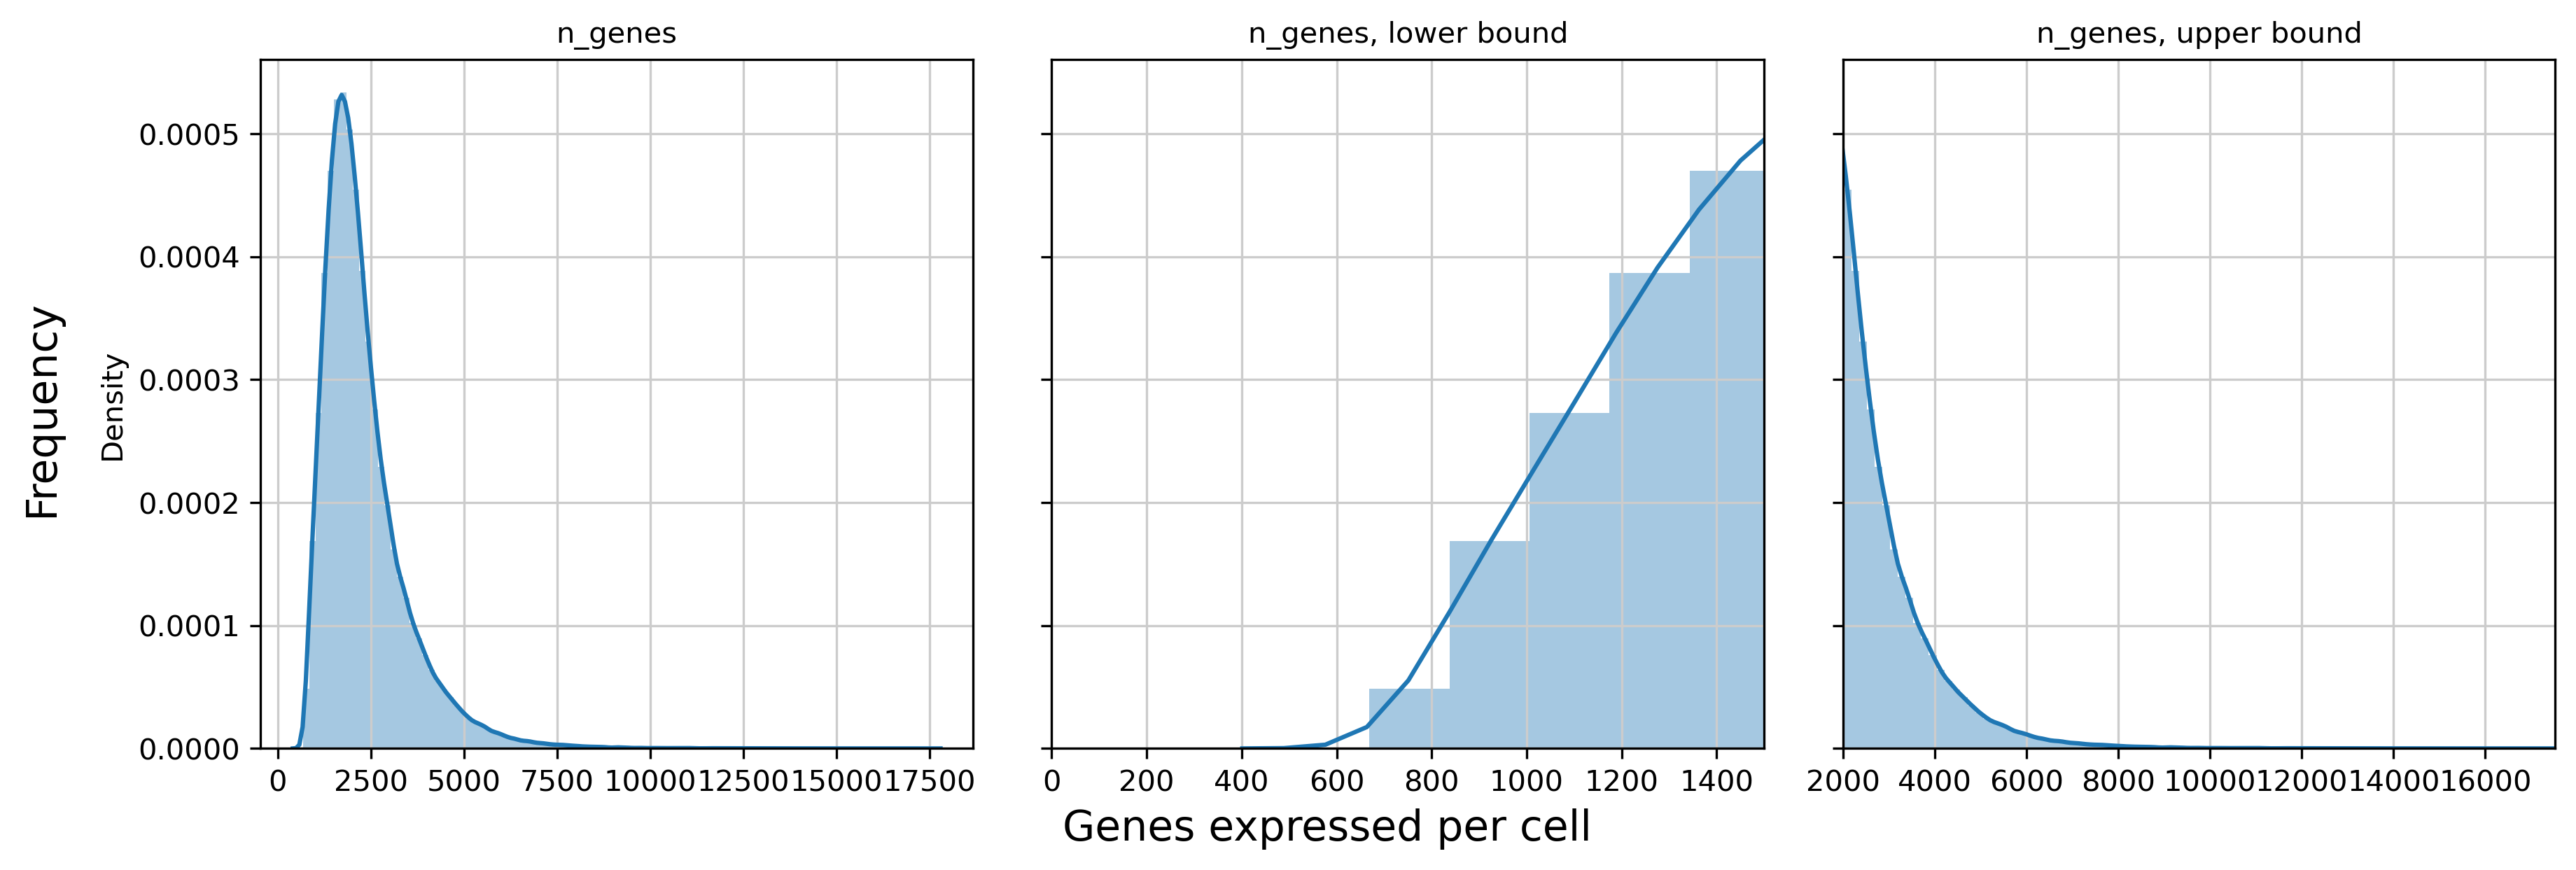

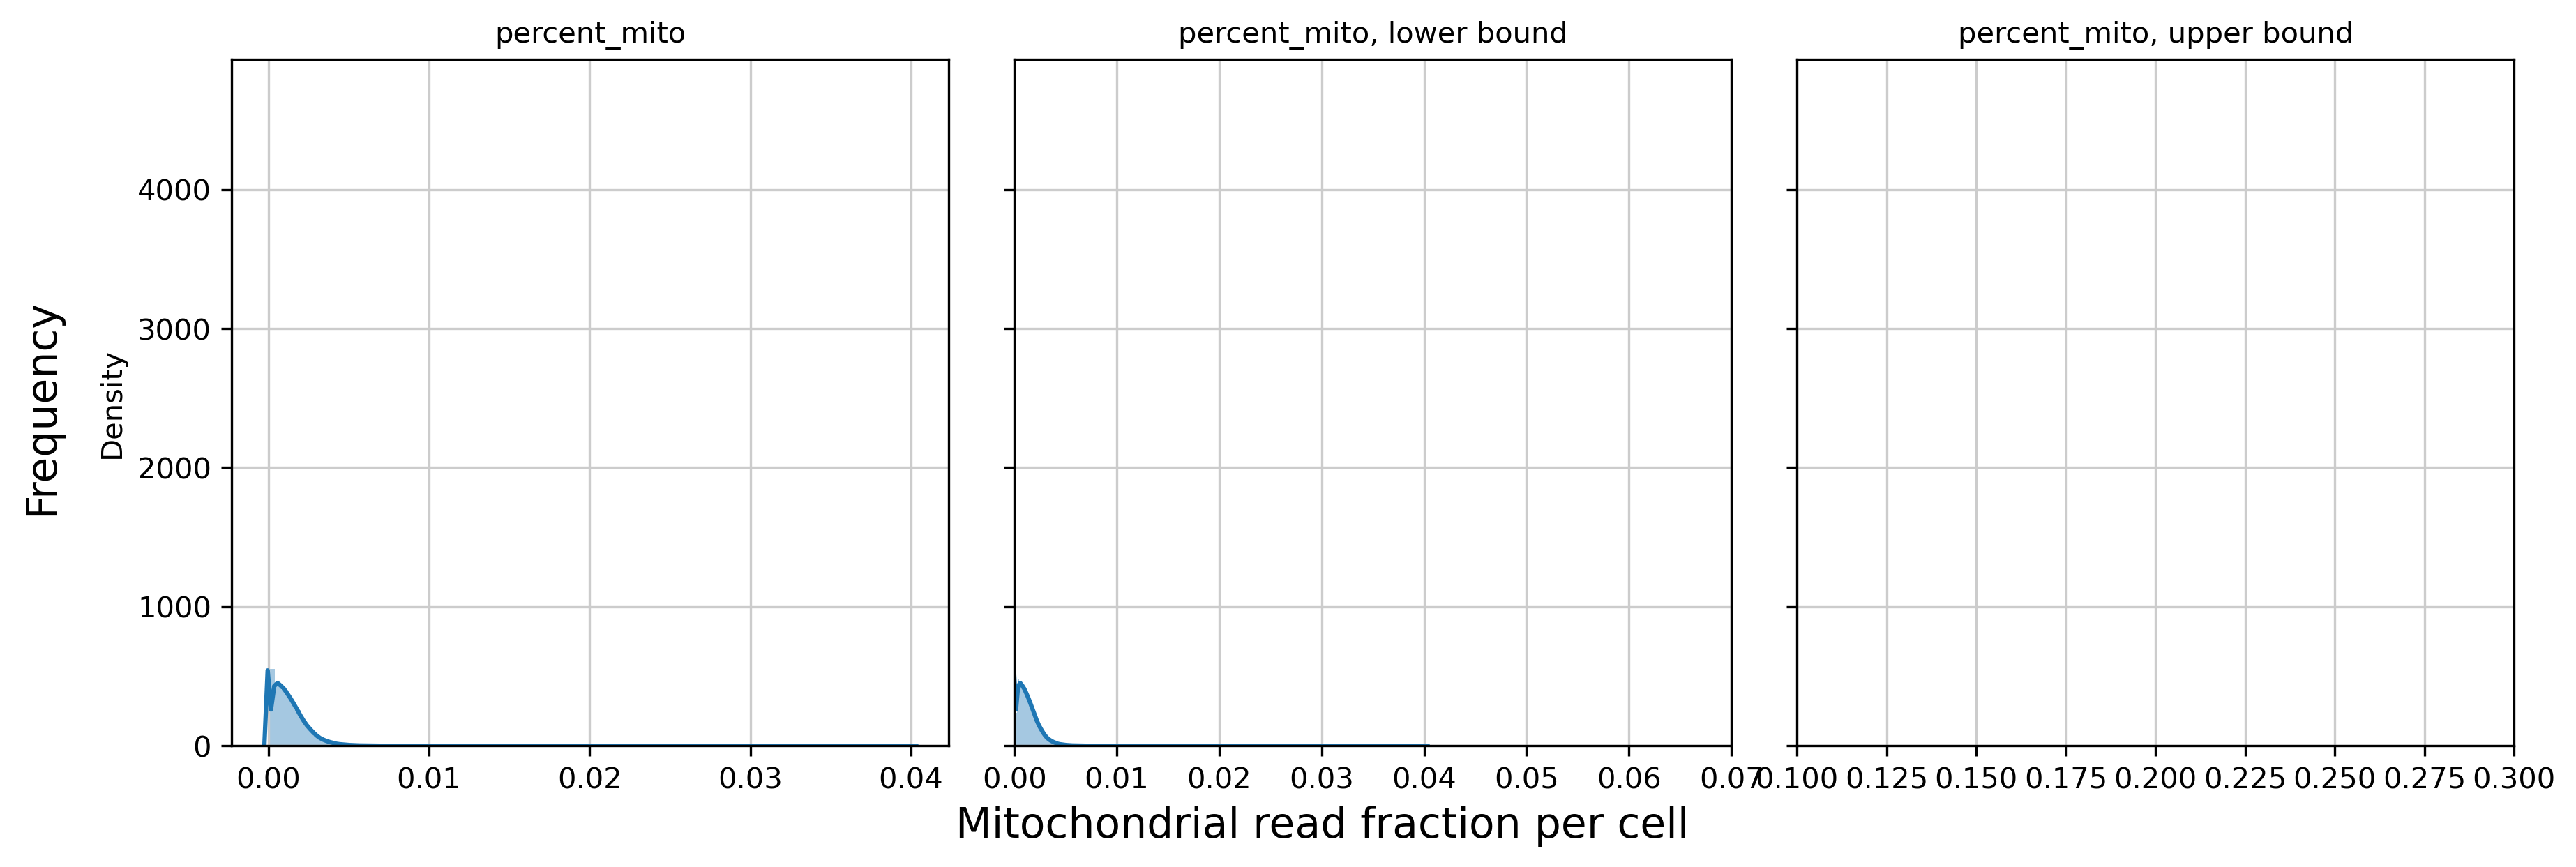

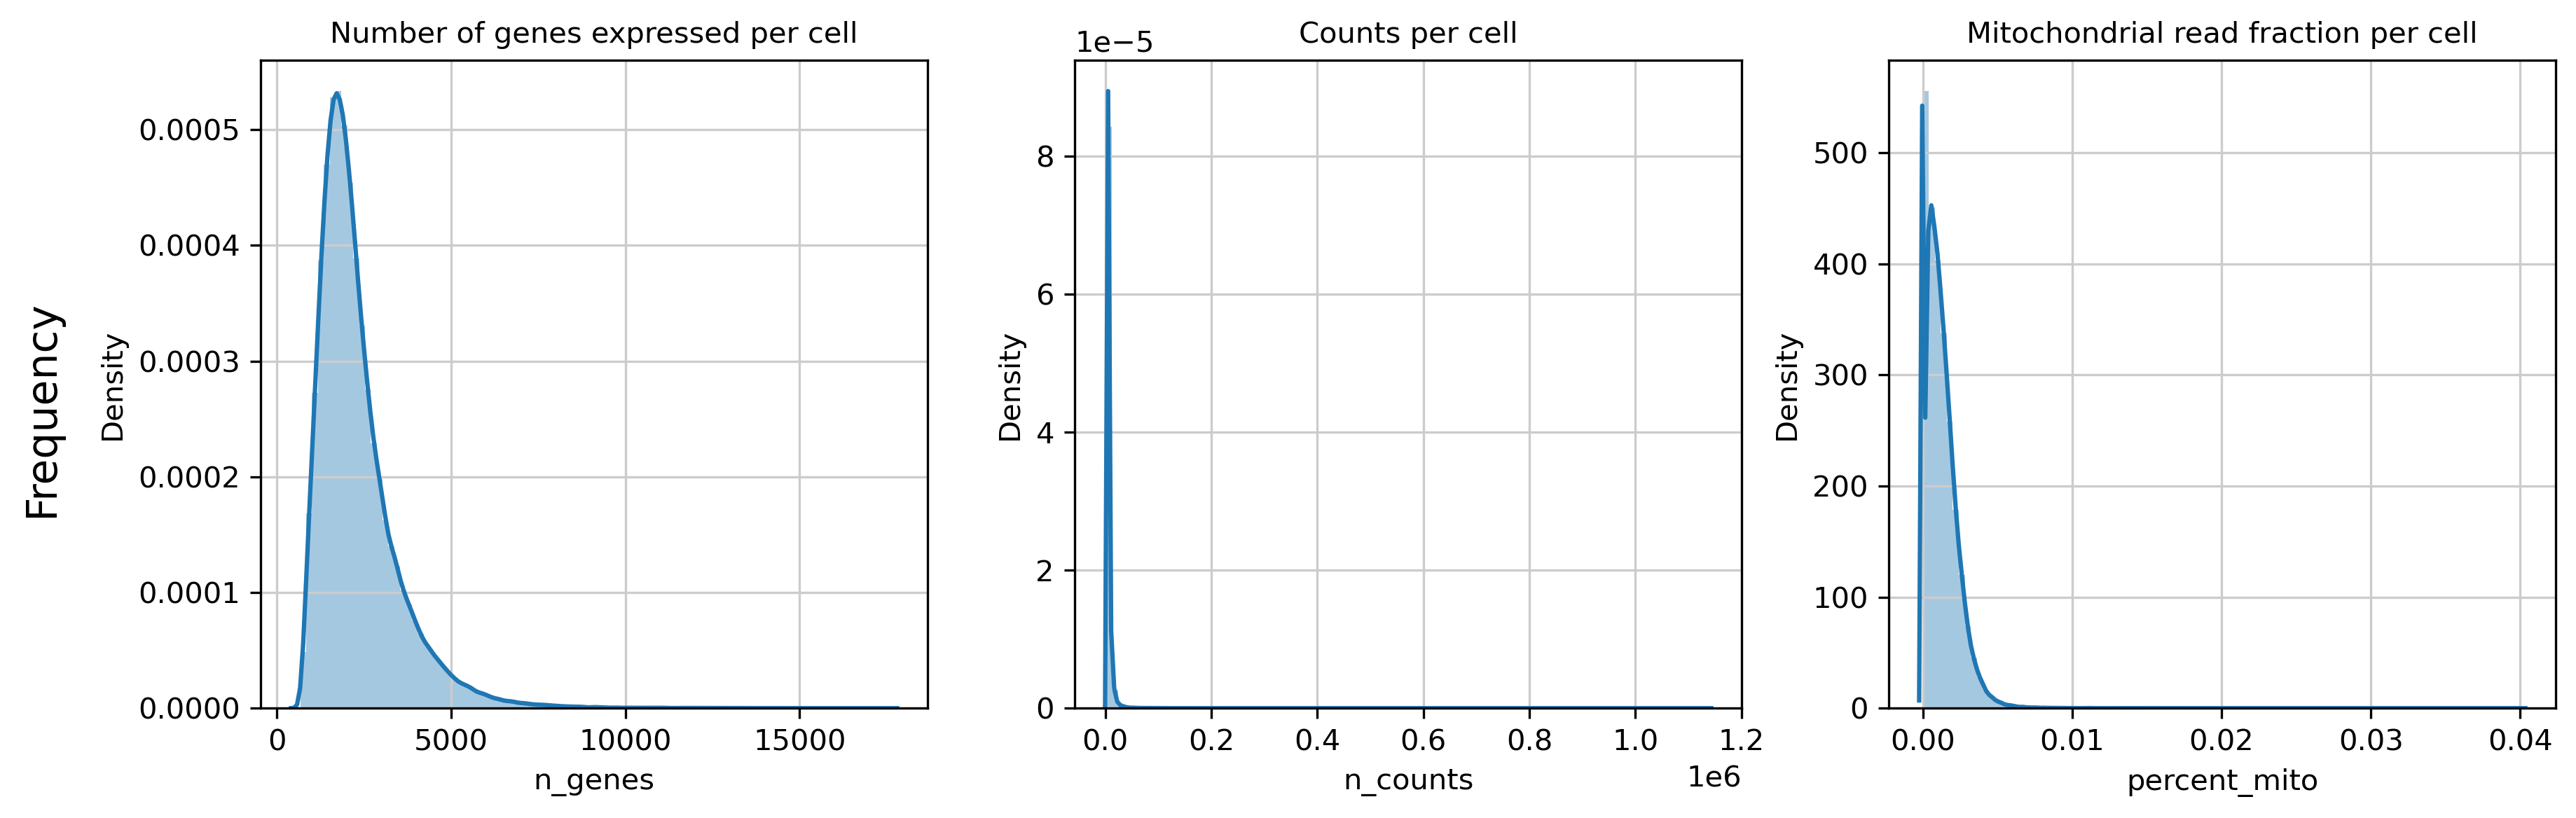

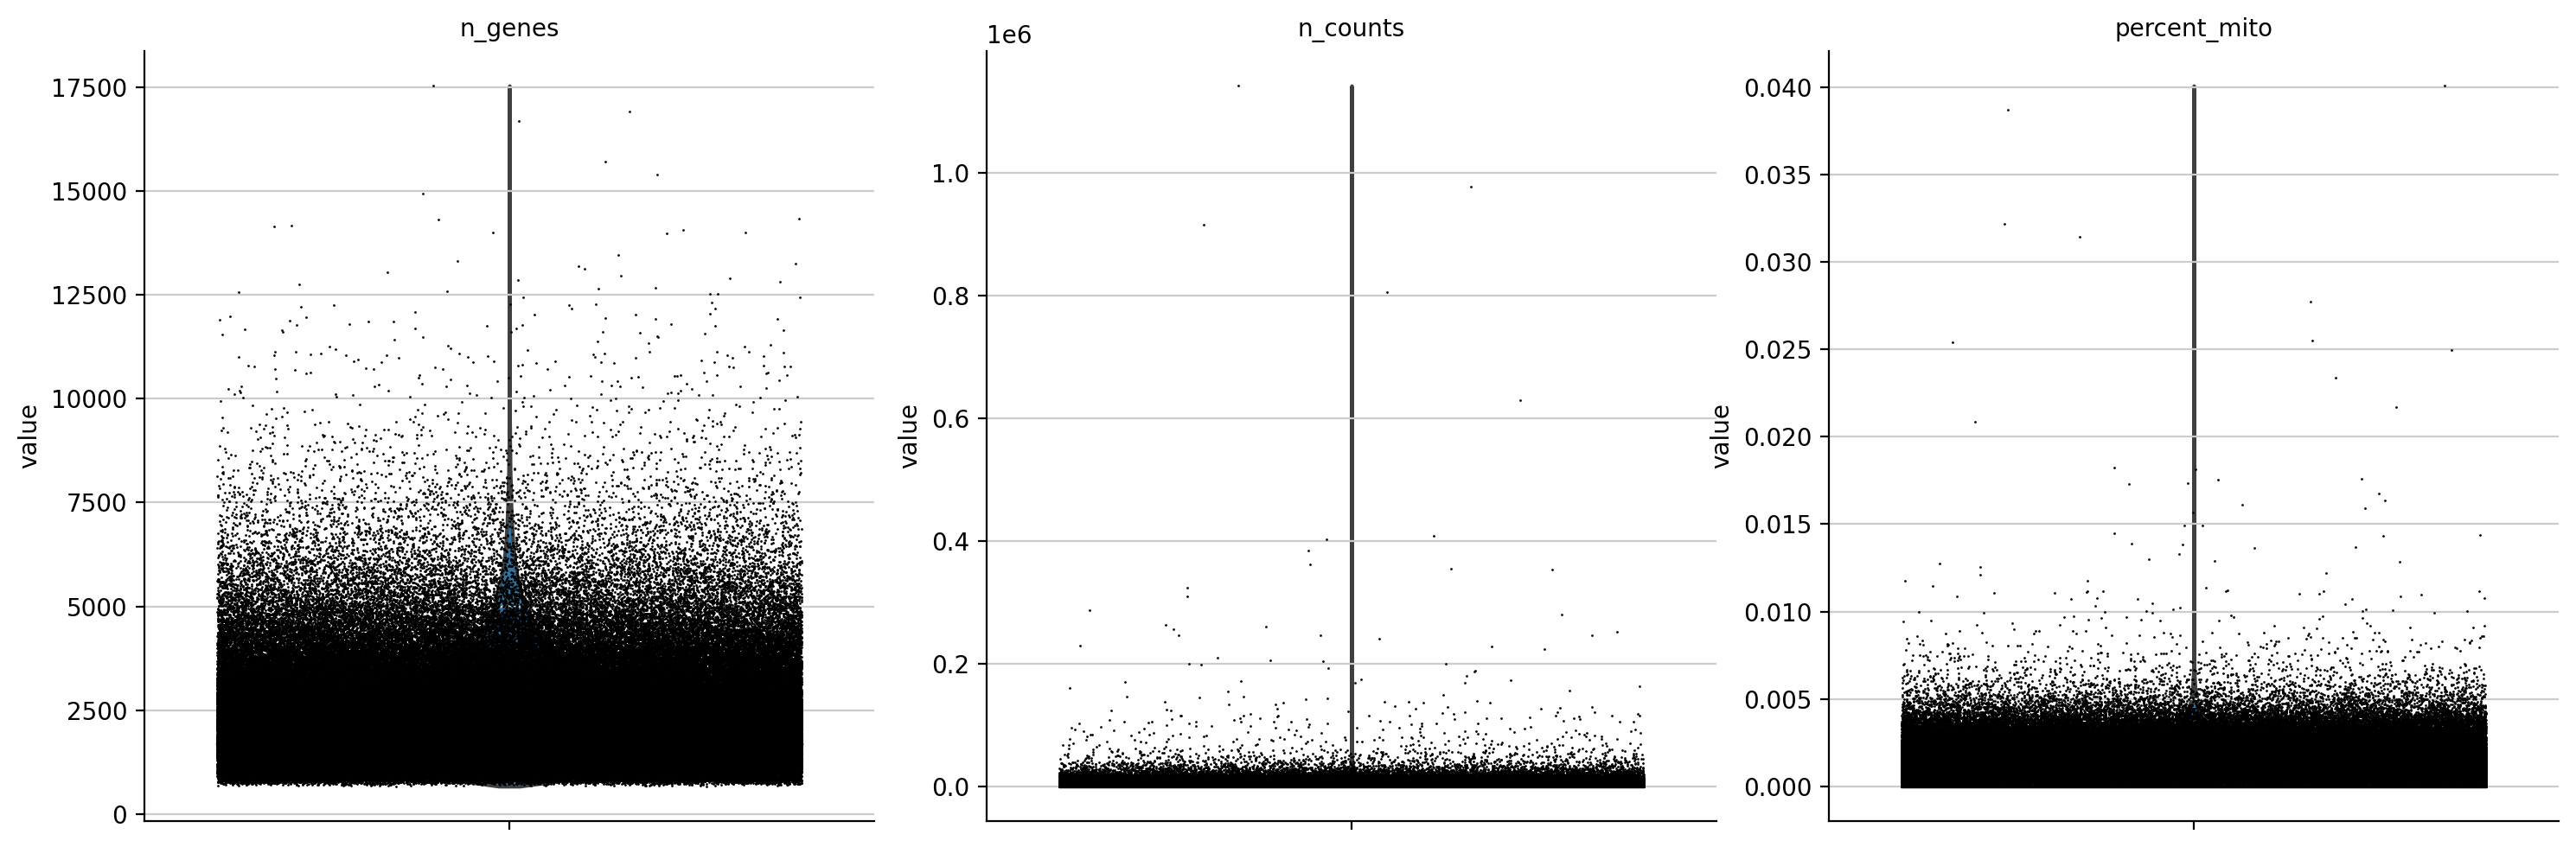

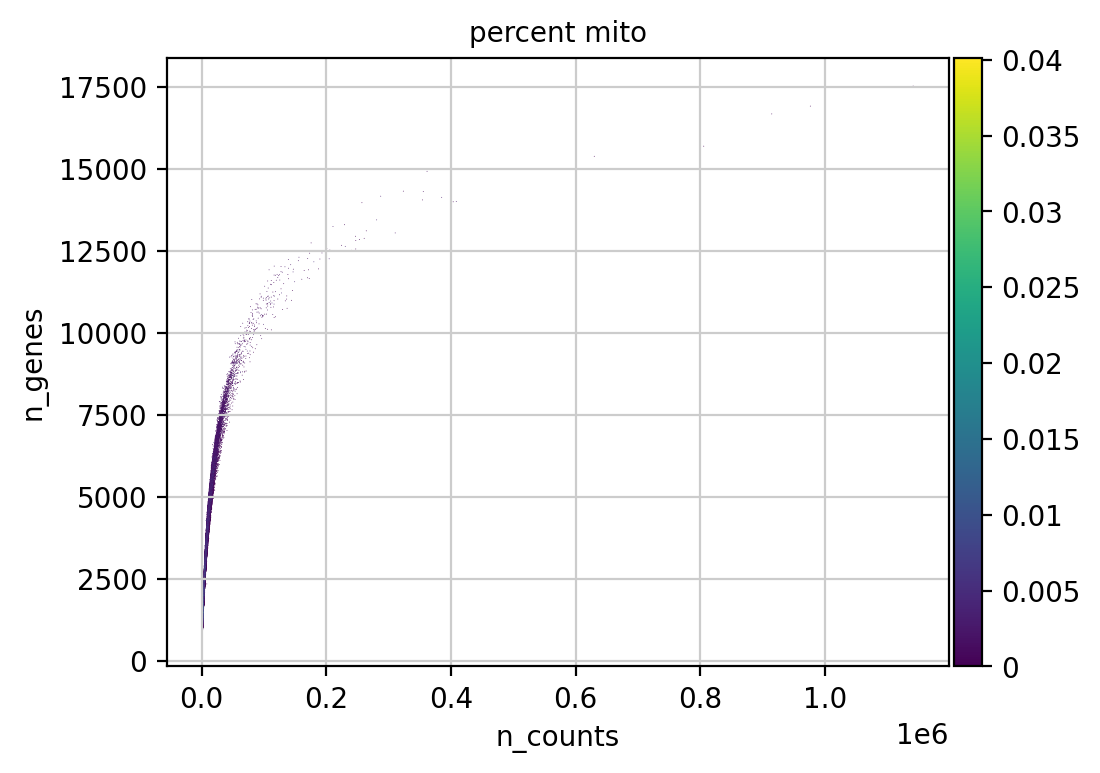

In [19]:
def QC_plots(adata,sample):
    nCountsPerGene = np.sum(adata.X, axis=0)
    nCellsPerGene = np.sum(adata.X>0, axis=0)

    # Show info
    print("Number of counts (in the dataset units) per gene:", nCountsPerGene.min(), " - " ,nCountsPerGene.max())
    print("Number of cells in which each gene is detected:", nCellsPerGene.min(), " - " ,nCellsPerGene.max())

    nCells=adata.X.shape[0]

    # pySCENIC thresholds
    minCountsPerGene=3*.01*nCells # 3 counts in 1% of cells
    print("minCountsPerGene: ", minCountsPerGene)

    minSamples=.01*nCells # 1% of cells
    print("minSamples: ", minSamples)

    # simply compute the number of genes per cell (computers 'n_genes' column)
    sc.pp.filter_cells(adata, min_genes=0)
    # mito and genes/counts cuts
    mito_genes = adata.var_names.str.startswith('MT-')
    # for each cell compute fraction of counts in mito genes vs. all genes
    adata.obs['percent_mito'] = np.sum(
        adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    # add the total counts per cell as observations-annotation to adata
    adata.obs['n_counts'] = adata.X.sum(axis=1).A1

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=True)

    x = adata.obs['n_genes']
    x_lowerbound = 1500
    x_upperbound = 2000
    nbins=100

    sns.distplot(x, ax=ax1, norm_hist=True, bins=nbins)
    sns.distplot(x, ax=ax2, norm_hist=True, bins=nbins)
    sns.distplot(x, ax=ax3, norm_hist=True, bins=nbins)

    ax2.set_xlim(0,x_lowerbound)
    ax3.set_xlim(x_upperbound, adata.obs['n_genes'].max() )

    for ax in (ax1,ax2,ax3): 
      ax.set_xlabel('')

    ax1.title.set_text('n_genes')
    ax2.title.set_text('n_genes, lower bound')
    ax3.title.set_text('n_genes, upper bound')

    fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
    fig.text(0.5, 0.0, 'Genes expressed per cell', ha='center', va='center', size='x-large')

    fig.tight_layout()
    fig.savefig('filtering_panel_genes.pdf', dpi=600, bbox_inches='tight')


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=True)

    x = adata.obs['percent_mito']
    x_lowerbound = [0.0, 0.07 ]
    x_upperbound = [ 0.10, 0.3 ]
    nbins=100

    sns.distplot(x, ax=ax1, norm_hist=True, bins=nbins)
    sns.distplot(x, ax=ax2, norm_hist=True, bins=int(nbins/(x_lowerbound[1]-x_lowerbound[0])) )
    sns.distplot(x, ax=ax3, norm_hist=True, bins=int(nbins/(x_upperbound[1]-x_upperbound[0])) )

    ax2.set_xlim(x_lowerbound[0], x_lowerbound[1])
    ax3.set_xlim(x_upperbound[0], x_upperbound[1] )
    for ax in (ax1,ax2,ax3): 
        ax.set_xlabel('')

    ax1.title.set_text('percent_mito')
    ax2.title.set_text('percent_mito, lower bound')
    ax3.title.set_text('percent_mito, upper bound')

    fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
    fig.text(0.5, 0.0, 'Mitochondrial read fraction per cell', ha='center', va='center', size='x-large')

    fig.tight_layout()
    fig.savefig('filtering_panel_mitochondria.pdf', dpi=600, bbox_inches='tight')


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=False)

    sns.distplot( adata.obs['n_genes'], ax=ax1, norm_hist=True, bins=100)
    sns.distplot( adata.obs['n_counts'], ax=ax2, norm_hist=True, bins=100)
    sns.distplot( adata.obs['percent_mito'], ax=ax3, norm_hist=True, bins=100)

    ax1.title.set_text('Number of genes expressed per cell')
    ax2.title.set_text('Counts per cell')
    ax3.title.set_text('Mitochondrial read fraction per cell')

    fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')

    fig.tight_layout()

    fig.savefig('filtering_panel_prefilter.pdf', dpi=600, bbox_inches='tight')

    sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
        jitter=0.4, multi_panel=True )

    sc.pl.scatter(adata, x='n_counts', y='n_genes', color='percent_mito')